In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pylab as plt
import seaborn as sns
my_cols = ["SUSPECT_ARRESTED_FLAG", "STOP_WAS_INITIATED",
                 "OBSERVED_DURATION_MINUTES", "SUSPECTED_CRIME_DESCRIPTION",
                 "STOP_DURATION_MINUTES", "FIREARM_FLAG",
                 "SUSPECT_RACE_DESCRIPTION",
                 "DEMEANOR_OF_PERSON_STOPPED", "SUSPECT_BODY_BUILD_TYPE","FRISKED_FLAG","SEARCHED_FLAG","STOP_LOCATION_BORO_NAME"]

data = pd.read_excel("sqf2022.xlsx", usecols=my_cols)
print(data.shape,'\n \n')
#pd.set_option('max_columns',200)
print(data.head(20))
print(data.columns)

(15102, 12) 
 

         STOP_WAS_INITIATED  OBSERVED_DURATION_MINUTES  \
0   Based on Self Initiated                          1   
1   Based on Self Initiated                          1   
2   Based on Self Initiated                          1   
3        Based on Radio Run                          5   
4        Based on Radio Run                          5   
5     Based on C/W on Scene                          5   
6     Based on C/W on Scene                          0   
7   Based on Self Initiated                          1   
8   Based on Self Initiated                          1   
9   Based on Self Initiated                          1   
10  Based on Self Initiated                          0   
11       Based on Radio Run                          1   
12  Based on Self Initiated                          1   
13  Based on Self Initiated                          1   
14  Based on Self Initiated                          5   
15       Based on Radio Run                          2  

<Axes: >

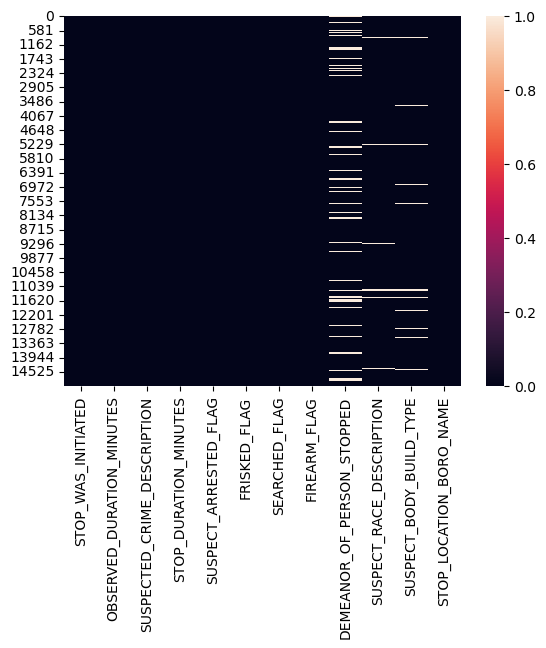

In [59]:
sns.heatmap(data.isnull())

In [54]:
# Preprocess data
Feature_test=["FIREARM_FLAG","FRISKED_FLAG","SEARCHED_FLAG"]

data['FIREARM_FLAG'] = data['FIREARM_FLAG'].replace('(null)', 'No')
data.replace('(null)', np.nan, inplace=True)

lb = LabelBinarizer()
data["SUSPECT_ARRESTED_FLAG"] = lb.fit_transform(data["SUSPECT_ARRESTED_FLAG"])
data["FIREARM_FLAG"] = lb.fit_transform(data["FIREARM_FLAG"])
data["FRISKED_FLAG"] = lb.fit_transform(data["FRISKED_FLAG"])
data["SEARCHED_FLAG"] = lb.fit_transform(data["SEARCHED_FLAG"])


data["SUSPECT_ARRESTED_FLAG"].fillna(data["SUSPECT_ARRESTED_FLAG"].median,inplace=True)
data["FIREARM_FLAG"].fillna(data["FIREARM_FLAG"].median,inplace=True)
data["FRISKED_FLAG"].fillna(data["FRISKED_FLAG"].median,inplace=True)
data["SEARCHED_FLAG"].fillna(data["SEARCHED_FLAG"].median,inplace=True)

print('STOP_WAS_INITIATED')
print(data['STOP_WAS_INITIATED'].head(10), '\n \n')
print('SUSPECTED_CRIME_DESCRIPTION')
print(data['SUSPECTED_CRIME_DESCRIPTION'].head(10))


STOP_WAS_INITIATED
0    Based on Self Initiated
1    Based on Self Initiated
2    Based on Self Initiated
3         Based on Radio Run
4         Based on Radio Run
5      Based on C/W on Scene
6      Based on C/W on Scene
7    Based on Self Initiated
8    Based on Self Initiated
9    Based on Self Initiated
Name: STOP_WAS_INITIATED, dtype: object 
 

SUSPECTED_CRIME_DESCRIPTION
0         CPW
1         CPW
2         CPW
3     ASSAULT
4     ASSAULT
5         CPW
6    MENACING
7         CPW
8         CPW
9         CPW
Name: SUSPECTED_CRIME_DESCRIPTION, dtype: object


In [49]:
# Both features have many cateegories, one hot encoder can help turn this data numerical
#One Hot-Encoding
OneHot_Encode_feature = ["STOP_WAS_INITIATED","SUSPECTED_CRIME_DESCRIPTION"]
Label_En = OneHotEncoder(handle_unknown="ignore")
Feature_Encoded = Label_En.fit_transform(data[OneHot_Encode_feature])
Label_df = pd.DataFrame(Feature_Encoded.toarray(), columns=Label_En.get_feature_names_out(OneHot_Encode_feature))

cat_feature=list(Label_df.columns)+Feature_test
data = pd.concat([data, Label_df], axis=1)
# drop the original categorical feature column
data = data.drop(columns=OneHot_Encode_feature)

data.head(50)

,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,SUSPECT_ARRESTED_FLAG,FRISKED_FLAG,SEARCHED_FLAG,FIREARM_FLAG,DEMEANOR_OF_PERSON_STOPPED,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,STOP_LOCATION_BORO_NAME,...,SUSPECTED_CRIME_DESCRIPTION_MENACING,SUSPECTED_CRIME_DESCRIPTION_MURDER,SUSPECTED_CRIME_DESCRIPTION_OTHER,SUSPECTED_CRIME_DESCRIPTION_PETIT LARCENY,SUSPECTED_CRIME_DESCRIPTION_RAPE,SUSPECTED_CRIME_DESCRIPTION_RECKLESS ENDANGERMENT,SUSPECTED_CRIME_DESCRIPTION_ROBBERY,SUSPECTED_CRIME_DESCRIPTION_TERRORISM,SUSPECTED_CRIME_DESCRIPTION_THEFT OF SERVICES,SUSPECTED_CRIME_DESCRIPTION_UNAUTHORIZED USE OF A VEHICLE
0,1,4,Y,Y,Y,Y,FLED ON FOOT,BLACK,U,BROOKLYN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,Y,Y,Y,Y,NaN,BLACK,MED,BRONX,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,Y,N,Y,Y,NERVOUS CHANGING DIRECTION FROM OFFICERS RUNNING,BLACK,THN,BRONX,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,10,N,N,N,(null),CALM,BLACK HISPANIC,(null),MANHATTAN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,10,N,N,N,(null),CALM,WHITE,(null),MANHATTAN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,40,N,Y,N,(null),HOSTILE,BLACK,THN,BRONX,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,8,N,N,N,(null),NaN,BLACK,MED,BROOKLYN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,1,N,Y,N,(null),CALM,WHITE HISPANIC,THN,BRONX,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,1,N,Y,N,(null),NaN,BLACK,THN,BROOKLYN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,1,N,Y,N,(null),CALM,BLACK,HEA,BROOKLYN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
data.describe()

,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,SUSPECT_ARRESTED_FLAG,FRISKED_FLAG,SEARCHED_FLAG,FIREARM_FLAG
count,15102.000000,15102.000000,15102.000000,15102.000000,15102.000000,15102.000000
mean,4.262349,9.258774,0.330089,0.600318,0.422196,0.078599
std,183.798874,17.529006,0.470260,0.489849,0.493926,0.269121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,10.000000,1.000000,1.000000,1.000000,0.000000
max,22041.000000,830.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Count')

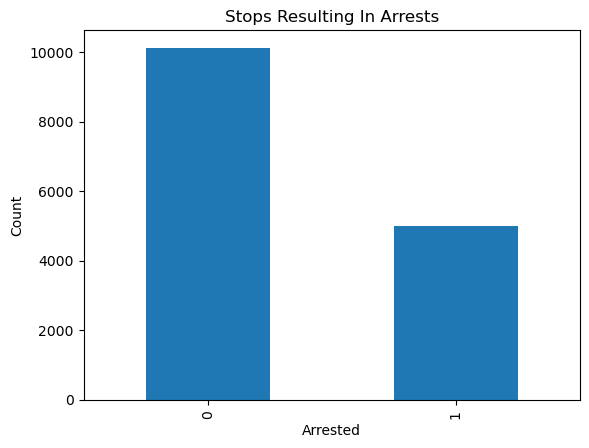

In [71]:
# How many arrrests do we have in our data set?

arplt = data['SUSPECT_ARRESTED_FLAG'].value_counts().head(10)\
    .plot(kind='bar', title='Stops Resulting In Arrests')

arplt.set_xlabel('Arrested')
arplt.set_ylabel('Count')

<Axes: title={'center': 'Race'}>

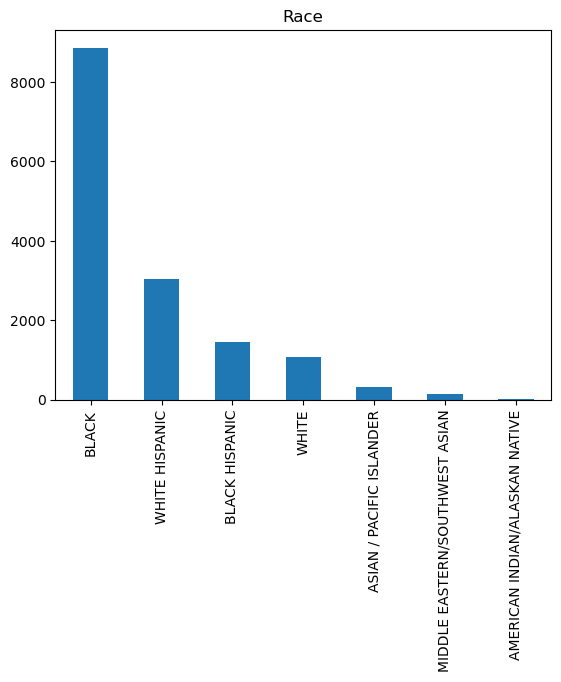

In [114]:
data['SUSPECT_RACE_DESCRIPTION'].value_counts().head(10)\
    .plot(kind='bar', title='Race')

<Axes: title={'center': 'Boroughs in the data set'}>

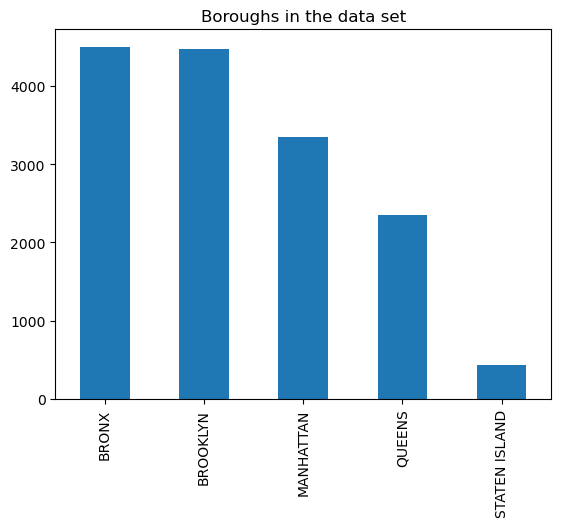

In [117]:
#STOP_LOCATION_BORO_NAME
data['STOP_LOCATION_BORO_NAME'].value_counts().head(10)\
    .plot(kind='bar', title='Boroughs in the data set')

count    15102.000000
mean         9.258774
std         17.529006
min          0.000000
25%          3.000000
50%          5.000000
75%         10.000000
max        830.000000
Name: STOP_DURATION_MINUTES, dtype: float64


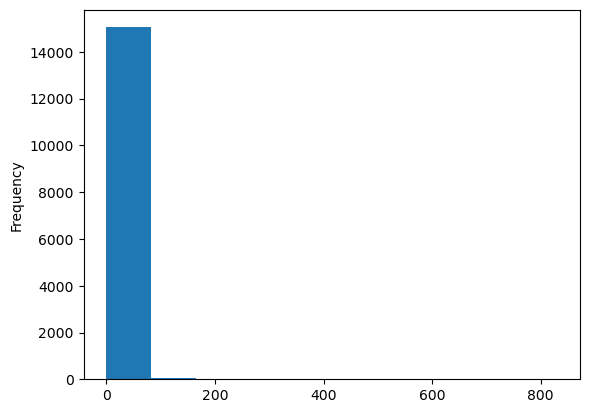

In [97]:
# Observed Duration Minutes
data['STOP_DURATION_MINUTES'].plot(kind='hist',bins=10)

print(data['STOP_DURATION_MINUTES'].describe())



## Analysis

As you can see from the description above. The feature cannot be visualized that well because of the existing outliers. The mean is around 9, but there exists values in the dataset as large as 830. So, the data cannot show much distribution in the histogram. The outliers have to be cut.

0         4
1         1
2         1
3        10
4        10
         ..
15097     7
15098     1
15099     2
15100     1
15101     1
Name: STOP_DURATION_MINUTES, Length: 15102, dtype: int64


Text(0.5, 0, 'Time')

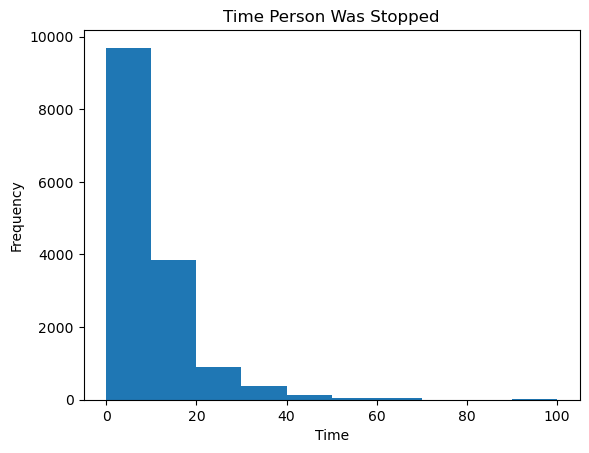

In [100]:
# Clipping the outlier
cutoff = 100
d_stop = data['STOP_DURATION_MINUTES']

print(d_stop)
cut_data = d_stop[d_stop <= cutoff]

c_plt = cut_data.plot(kind='hist',title="Time Person Was Stopped")

c_plt.set_xlabel('Time')


0         4
1         1
2         1
3        10
4        10
         ..
15097     7
15098     1
15099     2
15100     1
15101     1
Name: STOP_DURATION_MINUTES, Length: 15102, dtype: int64


Text(0.5, 0, 'Time')

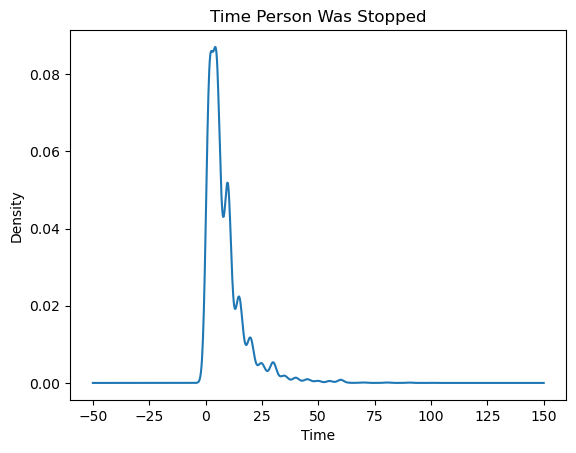

In [99]:
cutoff = 100
d_stop = data['STOP_DURATION_MINUTES']

print(d_stop)
cut_data = d_stop[d_stop <= cutoff]

c_plt = cut_data.plot(kind='kde', title="Time Person Was Stopped")

c_plt.set_xlabel('Time')

count    15102.000000
mean         4.262349
std        183.798874
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      22041.000000
Name: OBSERVED_DURATION_MINUTES, dtype: float64


<Axes: ylabel='Frequency'>

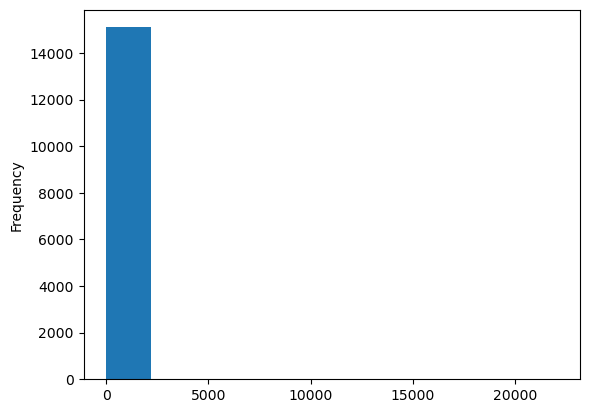

In [104]:
# Exploring Observed Duration Minutes
print(data['OBSERVED_DURATION_MINUTES'].describe())
data['OBSERVED_DURATION_MINUTES'].plot(kind='hist')

0        1
1        1
2        1
3        5
4        5
        ..
15097    1
15098    0
15099    1
15100    1
15101    1
Name: OBSERVED_DURATION_MINUTES, Length: 15102, dtype: int64


Text(0.5, 0, 'Time')

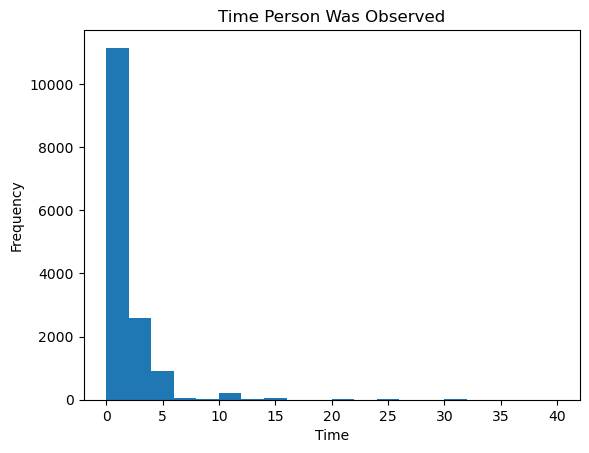

In [112]:
cutoff = 40
d_stop = data['OBSERVED_DURATION_MINUTES']

print(d_stop)
cut_data = d_stop[d_stop <= cutoff]

c_plt = cut_data.plot(kind='hist', bins = 20, title="Time Person Was Observed")

c_plt.set_xlabel('Time')

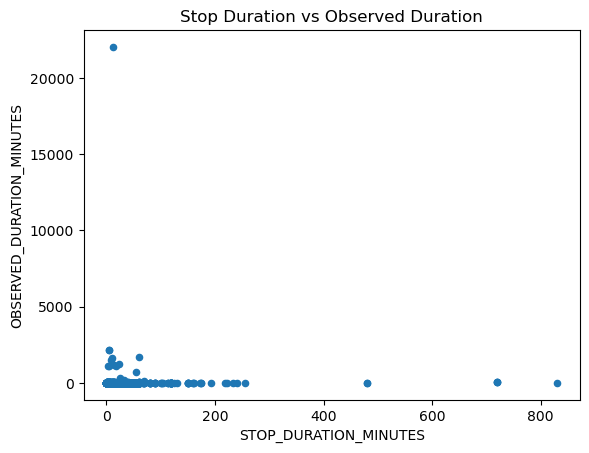

In [121]:
# Relationship between Time observed and Time stopped
data.plot(kind='scatter',x='STOP_DURATION_MINUTES', 
         y='OBSERVED_DURATION_MINUTES', title = 'Stop Duration vs Observed Duration')
plt.show()